# Introduction 

## Overview

The Community Data Management System is an object-oriented data management
system, specialized for organizing multidimensional, gridded data used
in climate analysis and simulation. 

CDMS is implemented as part of the Climate Data
Analysis Tool (CDAT), which uses the Python language. The examples in
this chapter assume some familiarity with the language and the Python
Numpy module (https://www.numpy.org). A number of excellent tutorials
on Python are available in books or on the Internet. For example, see
the [Python Foundation's homepage](https://python.org).


## Variables

The basic unit of computation in CDMS is the variable. A variable is essentially a multidimensional data array, augmented with a domain, a set of attributes, and optionally a spatial and/or temporal coordinate system [(see Coordinate Axes)](https://cdms.readthedocs.io/en/readthedocstest/manual/cdms_1.html#coordinate-axes).  As a data array, a variable can
be sliced to obtain a portion of the data, and can be used in arithmetic
computations. For example, if ``u`` and ``v`` are variables representing
the eastward and northward components of wind speed, respectively, and
both variables are functions of time, latitude, and longitude, then the
velocity for time 0 (first index) can be calculated as:

In [42]:
import cdms2
from cdms2 import MV2

In [41]:
# Uncomment the line below to donwload "clt.nc"
# !wget "https://cdat.llnl.gov/cdat/sample_data/clt.nc"
f1=cdms2.open("https://aims3.llnl.gov/thredds/dodsC/user_pub_work/CDAT-sample/v1/clt.nc")
u = f1('u')
v = f1('v')
from cdms2 import MV2
print(u.shape)

(1, 2, 80, 97)


MV is a module that wraps numpy masked arrays.  It keeps the axes, grid and other attributes.

In [43]:
vel = MV2.sqrt(u[0]**2 + v[0]**2)
print(vel.listattributes())
print("units: ", vel.units)
print(vel.getLevel())

['units', 'name', 'title', 'tileIndex', 'source', 'time', 'date', 'type']
('units: ', 'm/s')
   id: plev
   Designated a level axis.
   units:  hPa
   Length: 2
   First:  200.0
   Last:   850.0
   Other axis attributes:
      axis: Z
      realtopology: linear
   Python id:  0x7f96465a10d0



/export/reshel3/anaconda52/envs/cdms2/lib/python2.7/site-packages/numpy/ma/core.py:6652: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


## Several Points:

-  Square brackets represent the slice operator. Indexing starts at 0,
   so ``u[0]`` selects from variable ``u`` for the first timepoint. The
   result of this slice operation is another variable. The slice
   operator can be multidimensional, and follows the syntax of Numpy
   Python arrays. In this example, ``u[0:10,:,1]`` would retrieve data
   for the first ten timepoints, at all latitudes, for the second
   longitude.
-  Variables can be used in computation. ``**`` is the Python
   exponentiation operator.
-  Arithmetic functions are defined in the ``cdms2.MV2`` module.
-  Operations on variables carry along the corresponding metadata where
   applicable. In the above example, ``vel`` has the same latitude and
   longitude coordinates as ``u`` and ``v``, and the time coordinate is
   the first time of ``u`` and ``v``.

In [44]:
print u([0:10,:,1])

SyntaxError: invalid syntax (<ipython-input-44-56f365520c5d>, line 1)

# File I/O


A variable can be obtained from a file or collection of files, or can be
generated as the result of a computation. Files can be in any of the
self- describing formats `netCDF`, `HDF`, `GrADS/GRIB` *(GRIB with a GrADS
control file)*, or `PCMDI DRS`. (HDF and DRS support is optional, and is
configured at the time CDMS is installed.) For instance, here is an example to read data
from file clt.nc into variable u.

In [45]:
f = cdms2.open('https://aims3.llnl.gov/thredds/dodsC/user_pub_work/CDAT-sample/v1/clt.nc')
u = f('u')
u.shape

(1, 2, 80, 97)

Data can be read by index or by world coordinate values. The following reads the `n-th` timepoint of `u` *(the syntax slice(i,j)* refers to indices `k` such that `i <= k < j`):

In [46]:
n=0
u0 = f('u',time=slice(n,n+1))
u0.shape

(1, 2, 80, 97)

To read u at time 1:

In [47]:
l = f('u',time=1.)
l.shape

(1, 2, 80, 97)

A variable can be written to a file follwoing the CF-1 convention with the write function:

In [48]:
g = cdms2.open('sample2.nc','w')
g.write(u) 
g.close()
!ncdump -h sample2.nc

netcdf sample2 {
dimensions:
	time1 = UNLIMITED ; // (1 currently)
	plev = 2 ;
	latitude1 = 80 ;
	bound = 2 ;
	longitude1 = 97 ;
variables:
	float time1(time1) ;
		time1:units = "months since 1978-12" ;
		time1:calendar = "gregorian" ;
		time1:axis = "T" ;
	float plev(plev) ;
		plev:units = "hPa" ;
		plev:axis = "Z" ;
		plev:realtopology = "linear" ;
	float latitude1(latitude1) ;
		latitude1:bounds = "bounds_latitude1" ;
		latitude1:units = "degrees_north" ;
		latitude1:axis = "Y" ;
		latitude1:realtopology = "linear" ;
	double bounds_latitude1(latitude1, bound) ;
	float longitude1(longitude1) ;
		longitude1:bounds = "bounds_longitude1" ;
		longitude1:units = "degrees_east" ;
		longitude1:axis = "X" ;
		longitude1:topology = "circular" ;
		longitude1:modulo = 360. ;
		longitude1:realtopology = "linear" ;
	double bounds_longitude1(longitude1, bound) ;
	float u(time1, plev, latitude1, longitude1) ;
		u:_FillValue = 1.e+20f ;
		u:missing_value = 1.e+20f ;
		u:units = "m/s" ;
		u:name = "u

/export/reshel3/anaconda52/envs/cdms2/lib/python2.7/site-packages/cdms2/dataset.py:2187: Warning: Files are written with compression and no shuffling
You can query different values of compression using the functions:
cdms2.getNetcdfShuffleFlag() returning 1 if shuffling is enabled, 0 otherwise
cdms2.getNetcdfDeflateFlag() returning 1 if deflate is used, 0 otherwise
cdms2.getNetcdfDeflateLevelFlag() returning the level of compression for the deflate method

If you want to turn that off or set different values of compression use the functions:
value = 0
cdms2.setNetcdfShuffleFlag(value) ## where value is either 0 or 1
cdms2.setNetcdfDeflateFlag(value) ## where value is either 0 or 1
cdms2.setNetcdfDeflateLevelFlag(value) ## where value is a integer between 0 and 9 included

To produce NetCDF3 Classic files use:
cdms2.useNetCDF3()
To Force NetCDF4 output with classic format and no compressing use:
cdms2.setNetcdf4Flag(1)
NetCDF4 file with no shuffling or deflate and noclassic will be open

# Coordinate Axes


A coordinate axis is a variable that represents coordinate information.
Typically an axis is associated with one or more variables in a file or
dataset, to represent the indexing and/or spatiotemporal coordinate
system(s) of the variable(s).

Often in climate applications an axis is a one-dimensional variable
whose values are floating-point and strictly monotonic. In some cases an
axis can be multidimensional (see `Grids`). If an axis is
associated with one of the canonical types latitude, longitude, level,
or time, then the axis is called temporal .

The shape and physical ordering of a variable is represented by the
variables domain , an ordered tuple of one-dimensional axes. In the
previous example, the domain of the variable u is the tuple (time,
latitude, longitude). This indicates the order of the dimensions, with
the slowest-varying dimension listed first (time). The domain may be
accessed with the ``getAxisList()`` method:


In [49]:
u.getAxisList() 

[   id: time1
    Designated a time axis.
    units:  months since 1978-12
    Length: 1
    First:  1.0
    Last:   1.0
    Other axis attributes:
       calendar: gregorian
       axis: T
    Python id:  0x7f96465a1b50,    id: plev
    Designated a level axis.
    units:  hPa
    Length: 2
    First:  200.0
    Last:   850.0
    Other axis attributes:
       axis: Z
       realtopology: linear
    Python id:  0x7f96465a1090,    id: latitude1
    Designated a latitude axis.
    units:  degrees_north
    Length: 80
    First:  -88.2884
    Last:   88.2884
    Other axis attributes:
       axis: Y
       realtopology: linear
    Python id:  0x7f96465a1050,    id: longitude1
    Designated a longitude axis.
    units:  degrees_east
    Length: 97
    First:  -180.0
    Last:   180.0
    Other axis attributes:
       axis: X
       topology: circular
       modulo: 360.0
       realtopology: linear
    Python id:  0x7f96465a1c50]

In the above example, the domain elements are axes that are also
spatiotemporal. In general it is not always the case that an element of
a domain is spatio-temporal: 

-  An axis in the domain of a variable need not be spatiotemporal. For
   example, it may represent a range of indices, an index coordinate
   system.
-  The latitude and/or longitude coordinate axes associated with a
   variable need not be elements of the domain. In particular this will
   be true if the variable is defined on a non-rectangular grid (see Grids <#grids>`__).

As previously noted, a spatial and/or temporal coordinate system may be
associated with a variable. The methods getLatitude, getLongitude,
getLevel, and getTime return the associated coordinate axes. For
example:

In [50]:
t = u.getTime()
print(t[:])
print(t.units)

[1.]
months since 1978-12


## Attributes

As mentioned above, variables can have associated attributes ,
name-value pairs. In fact, nearly all CDMS objects can have associated
attributes, which are accessed using the Python dot notation:

In [52]:
u.units='m/s'
print(u.units)

m/s


Attribute values can be strings, scalars, or 1-D Numpy arrays.

When a variable is written to a file, not all the attributes are
written. Some attributes, called internal attributes, are used for
bookkeeping, and are not intended to be part of the external file
representation of the variable. In contrast, external attributes are
written to an output file along with the variable. By default, when an
attribute is set, it is treated as external. Every variable has a field
attributes, a Python dictionary that defines the external attributes:

In [53]:
print(u.attributes.keys())

['name', 'title', 'tileIndex', 'date', 'source', 'time', 'units', 'type']


The Python dir command lists the internal attribute names:

In [54]:
dir(u)

['T',
 '_FillValue',
 '_TransientVariable__domain',
 '_TransientVariable__getMPIType',
 '_TransientVariable__getSlab',
 '_TransientVariable__mpiComm',
 '_TransientVariable__mpiType',
 '_TransientVariable__mpiWindows',
 '___cdms_internals__',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__call__',
 '__cdms_internals__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getslice__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__hex__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__ir

In general internal attributes should not be modified directly. One
exception is the id attribute, the name of the variable. It is used in
plotting and I/O, and can be set directly.

## Masked values

Optionally, variables have a mask that represents where data are
missing. If present, the mask is an array of ones and zeros having the
shape of the data array. A mask value of one indicates that the
corresponding data array element is missing or invalid.

Arithmetic operations in CDMS take missing data into account. The same
is true of the functions defined in the MV2 module. For example:



In [1]:
import MV2
a = MV2.array([1,2,3]) # Create array a, with no mask
b = MV2.array([4,5,6]) # Same for b
a+b # variable_... array([5,7,9,]) 

a[1]=MV2.masked # Mask the second value of a a.mask()
a.mask

a+b # The sum is masked also 

variable_6
masked_array(data=[5, --, 9],
             mask=[False,  True, False],
       fill_value=999999)

When data is read from a file, the result variable is masked if the file
variable has a ``fill_value`` attribute. The mask is set to one for
those elements equal to the missing value, zero elsewhere. If no such
attribute is present in the file, the result variable is not masked.

When a variable with masked values is written to a file, data values
with a corresponding mask value of one are set to the value of the
variables ``missing_value`` attribute. The data and ``missing_value``
attribute are then written to the file.

[https://www.numpy.org/](https://www.numpy.org/).

---

## File Variables

A variable can be obtained either from a file, a collection of files, or
as the result of computation. Correspondingly there are three types of
variables in CDMS:

-  *file variable* is a variable associated with a single data file.
   Setting or referencing a file variable generates I/O operations.
-  A *dataset variable* is a variable associated with a collection of
   files. Reference to a dataset variable reads data, possibly from
   multiple files. Dataset variables are read-only.
-  *transient variable* is an in-memory object not associated with a
   file or dataset. Transient variables result from a computation or I/O
   operation.

Typical use of a file variables is to inquire information about the
variable in a file without actually reading the data for the variables.
A file variable is obtained by applying the slice operator [] to a file,
passing the name of the variable, or by calling the getVariable
function. Note that obtaining a file variable does not actually read the
data array:

In [55]:
u = f.getVariable('u') # or u=f['u']
u.shape 


(1, 2, 80, 97)

File variables are also useful for fine-grained I/O. They behave like
transient variables, but operations on them also affect the associated
file. Specifically:

-  slicing a file variable reads data,
-  setting a slice writes data,
-  referencing an attribute reads the attribute,
-  setting an attribute writes the attribute,
-  and calling a file variable like a function reads data associated
   with the variable:

In [2]:
!wget  http://cdat.llnl.gov/cdat/sample_data/clt.nc
import os
os.system("cp clt.nc /tmp")

f = cdms2.open('/tmp/clt.nc','a') # Open read/write
uvar = f['u'] # Note square brackets
uvar.shape

u0 = uvar[0] # Reads data from sample.nc
u0.shape



--2019-02-07 14:16:04--  http://cdat.llnl.gov/cdat/sample_data/clt.nc
Resolving cdat.llnl.gov... 198.128.245.146
Connecting to cdat.llnl.gov|198.128.245.146|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdat.llnl.gov/cdat/sample_data/clt.nc [following]
--2019-02-07 14:16:04--  https://cdat.llnl.gov/cdat/sample_data/clt.nc
Connecting to cdat.llnl.gov|198.128.245.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1718908 (1.6M) [application/x-netcdf]
Saving to: “clt.nc.1”

100%[======================================>] 1,718,908   --.-K/s   in 0.03s   

2019-02-07 14:16:04 (64.9 MB/s) - “clt.nc.1” saved [1718908/1718908]



NameError: name 'cdms2' is not defined

### Writes data to file sample.nc

In [56]:
uvar[1]=u0 # Writes data to sample.nc
uvar.units # Reads the attribute 'm/s'

NameError: name 'uvar' is not defined

### Calling  a variable like a function reads data

In [57]:
u24 = uvar(time=1.0) # Calling  a variable like a function reads data
f.close() # Save changes to clt.nc (I/O may be buffered)

NameError: name 'uvar' is not defined

For transient variables, the data is printed only if the size of the array is less
than the print limit . This value can be set with the function
MV2.set_print_limit to force the data to be printed:

In [58]:
print(MV2.get_print_limit()) # Current limit 1000
MV2.set_print_limit(100)
print(MV2.get_print_limit())

1000
100


The datatype of the variable is determined with the typecode function:

In [59]:
u.typecode()

'f'

## Dataset Variables

The third type of variable, a *dataset variable*, is associated with a
*dataset*, a collection of files that is treated as a single file. A
dataset is created with the ``cdscan`` utility. This generates an XML
metafile that describes how the files are organized and what metadata
are contained in the files. In a climate simulation application, a
dataset typically represents the data generated by one run of a general
circulation or coupled ocean-atmosphere model.

For example, suppose data for variables u and v are stored in six files:

1. u_2000.nc,
2. u_2001.nc,
3. u_2002.nc,
4. v_2000.nc,
5. v_2001.nc,
6. v_2002.nc.

A metafile can be generated with the command:

``$ cdscan -x cdsample.xml [uv]*.nc``

The metafile **cdsample.xml** is then used like an ordinary data file:

In [60]:
!wget  http://cdat.llnl.gov/cdat/sample_data/u_2000.nc >/dev/null  2>/dev/null
!wget  http://cdat.llnl.gov/cdat/sample_data/u_2001.nc >/dev/null  2>/dev/null
!wget  http://cdat.llnl.gov/cdat/sample_data/u_2002.nc >/dev/null  2>/dev/null
!wget  http://cdat.llnl.gov/cdat/sample_data/v_2000.nc >/dev/null  2>/dev/null
!wget  http://cdat.llnl.gov/cdat/sample_data/v_2001.nc >/dev/null  2>/dev/null
!wget  http://cdat.llnl.gov/cdat/sample_data/v_2002.nc >/dev/null  2>/dev/null
!cdscan -x cdsample.xml [uv]*.nc

Finding common directory ...
Common directory: 
Scanning files ...
u_2000.nc
Setting reference time units to days since 2000-1-1
u_2001.nc
Setting reference time units to days since 2000-1-1
u_2002.nc
Setting reference time units to days since 2000-1-1
v_2000.nc
Setting reference time units to days since 2000-1-1
v_2001.nc
Setting reference time units to days since 2000-1-1
v_2002.nc
Setting reference time units to days since 2000-1-1
cdsample.xml written


In [61]:
!ls -l cdsample.xml

-rw-r----- 1 reshel3 reshel3 1789 Feb  7 15:00 cdsample.xml


In [62]:
import cdms2
fsample=cdms2.open("cdsample.xml")
udata=fsample['u']
print("aggregated u:",udata.shape)
vdata=fsample['u']
print("aggregated v:", vdata.shape)

('aggregated u:', (3, 16, 32))
('aggregated v:', (3, 16, 32))


## Grids

A latitude-longitude grid represents the coordinate information
associated with a variable. A grid encapsulates:

-  latitude, longitude coordinates
-  grid cell boundaries
-  area weights

CDMS defines a rich set of grid types to represent the variety of
coordinate systems used in climate model applications. Grids can be
categorized as rectangular or nonrectangular.

A rectangular grid has latitude and longitude axes that are
one-dimensional, with strictly monotonic values. The grid is essentially
the Cartesian product of the axes. If either criterion is not met, the
grid is nonrectangular .

CDMS supports two types of nonrectangular grid:

  -  A curvilinear grid consists of a latitude and longitude axis, each of
     which is a two-dimensional coordinate axis. Curvilinear grids are
     often used in ocean model applications.
  -  A generic grid consists of a latitude and longitude axis, each of
     which is an auxiliary one-dimensional coordinate axis. An auxiliary
     axis has values that are not necessarily monotonic. As the name
     suggests, generic grids can represent virtually any type of grid.
     However, it is more difficult to determine adjacency relationships
     between grid points.

### Example: A Curvilinear Grid

In this example, variable sample is defined on a 128x192 curvilinear
grid. Note that:

-  The domain of variable sample is ( y , x ) where y and x are index
   coordinate axes.
-  The curvilinear grid associated with sample consists of axes ( lat ,
   lon ), each a two-dimensional coordinate axis.
-  lat and lon each have domain ( y , x )

In [63]:
# uncomment the line below to donwload "clt.nc"
# wget "https://cdat.llnl.gov/cdat/sample_data/sampleCurveGrid4.nc"
f = cdms2.open('https://aims3.llnl.gov/thredds/dodsC/user_pub_work/CDAT-sample/v1/sampleCurveGrid4.nc')

``lat`` and ``lon`` are coordinate axes, but are grouped with data variables

In [64]:
import MV2
print(f.variables.keys())

['lat', 'sample', 'bounds_lon', 'lon', 'bounds_lat']


y and x are index coordinate axes

In [65]:
print(f.axes.keys())

['nvert', 'x', 'y']


Read data for variable sample

In [66]:
sample = f('sample')

The associated grid g is curvilinear

In [67]:
g = sample.getGrid()

The domain of the variable consfigists of index axes

In [68]:
sample.getAxisIds()

['y', 'x']

Get the coordinate axes associated with the grid

In [69]:
lat = g.getLatitude() # or sample.getLatitude()
lon = g.getLongitude() # or sample.getLongitude()

lat and lon have the same domain, a subset of the domain of 'sample'

In [70]:
lat.getAxisIds()

['y', 'x']

lat and lon are variables ...

In [71]:
print(lat.shape)

(32, 48)


In [11]:
print(lat)

NameError: name 'lat' is not defined

lat_in_radians = lat*MV2.pi/180.0

In [72]:
print(lat_in_radians)

NameError: name 'lat_in_radians' is not defined

# Example: A Generic Grid

In this example variable zs is defined on a generic grid. 

In [73]:
print(f.variables.keys())

['lat', 'sample', 'bounds_lon', 'lon', 'bounds_lat']


['lat', 'sample', 'bounds_lon', 'lon', 'bounds_lat']

In [74]:
print(f.axes.keys())

['nvert', 'x', 'y']


['nvert', 'x', 'y']

In [75]:
zs = f("sample")
g = zs.getGrid()
g

<TransientCurveGrid, id: grid_2, shape: (32, 48)>

variable zs is defined in terms of a single index coordinate

In [76]:
lat = g.getLatitude()
lon = g.getLongitude()
print(lat.shape)
print(lon.shape) 

(32, 48)
(32, 48)


cell axis

In [77]:
zs.shape

(32, 48)

In [78]:
zs.getAxisIds()

['y', 'x']

lat and lon are also defined in terms of the cell axis

In [79]:
lat.getAxisIds()

['y', 'x']

lat and lon are one-dimensional, 'auxiliary' coordinate
axes: values are not monotonic

In [80]:
lat.__class__

cdms2.coord.TransientAxis2D


Generic grids can be used to represent any of the grid types. The method
toGenericGrid can be applied to any grid to convert it to a generic
representation. Similarly, a rectangular grid can be represented as
curvilinear. The method toCurveGrid is used to convert a non-generic
grid to curvilinear representation:


In [81]:
f = cdms2.open('https://aims3.llnl.gov/thredds/dodsC/user_pub_work/CDAT-sample/v1/clt.nc')
clt = f('clt')
rectgrid = clt.getGrid()
print("rectgrid:", rectgrid.shape)

curvegrid = rectgrid.toCurveGrid()
print("curvegrid:", curvegrid)

genericgrid = curvegrid.toGenericGrid()
print("genericgrid: ", genericgrid)

('rectgrid:', (46, 72))
('curvegrid:', <TransientCurveGrid, id: grid_3, shape: (46, 72)>)
('genericgrid: ', <TransientGenericGrid, id: grid_1, shape: (3312,)>)


# Regridding

Regridding is the process of mapping variables from one grid to another.
CDMS supports two forms of regridding. Which one you use depends on the
class of grids being transformed:

-  To interpolate from one rectangular grid to another, use the built-in
   CDMS regridder. CDMS also has built-in regridders to interpolate from
   one set of pressure levels to another, or from one vertical
   cross-section to another.
-  To interpolate from any lat-lon grid, rectangular or non-rectangular,
   use the ``SCRIP`` regridder.

## CDMS Regridder

The built-in CDMS regridder is used to transform data from one
rectangular grid to another. For example, to regrid variable ``u`` (from
a rectangular grid) to a 96x192 rectangular Gaussian grid:


In [82]:
f = cdms2.open('https://aims3.llnl.gov/thredds/dodsC/user_pub_work/CDAT-sample/v1/clt.nc')
u = f('u')
print("u.shape:", u.shape)

t63_grid = cdms2.createGaussianGrid(96)
u63 = u.regrid(t63_grid)
print("U63.shape",u63.shape)

('u.shape:', (1, 2, 80, 97))


/export/reshel3/anaconda52/envs/cdms2/lib/python2.7/site-packages/cdms2/avariable.py:1347: Warning: 
avariable.regrid: We chose regridTool = esmf for you among the following choices:
   Tools ->    'regrid2' (old behavior)
               'esmf' (conserve, patch, linear) or
               'libcf' (linear)
  warnings.warn(message, Warning)
/export/reshel3/anaconda52/envs/cdms2/lib/python2.7/site-packages/cdms2/avariable.py:1354: Warning: 
avariable.regrid: We chose regridMethod = linear for you among the following choices:
    'conserve' or 'linear' or 'patch'
  warnings.warn(message, Warning)


('U63.shape', (1, 2, 96, 192))


To regrid a variable ``uold`` to the same grid as variable ``vnew``:


In [83]:
f = cdms2.open('https://aims3.llnl.gov/thredds/dodsC/user_pub_work/CDAT-sample/v1/clt.nc')
f2 = cdms2.open('https://aims3.llnl.gov/thredds/dodsC/user_pub_work/CDAT-sample/v1/geos5-sample.nc')
uold = f('u')
unew = f2('uwnd')
print("uold.shape", uold.shape)
unew.shape
print("unew.shape", unew.shape)
t63_grid = unew.getGrid() # Obtain the grid for vnew
u63 = uold.regrid(t63_grid)
u63.shape

('uold.shape', (1, 2, 80, 97))
('unew.shape', (1, 14, 181, 360))


(1, 2, 181, 360)

## SCRIP Regridder

To interpolate between any lat-lon grid types, the SCRIP regridder may
be used. The SCRIP package was developed at [Los Alamos National
Laboratory] (https://github.com/SCRIP-Project/SCRIP).
SCRIP is written in Fortran 90, and must be built and installed
separately from the CDAT/CDMS installation.

The steps to regrid a variable are:

```(external to CDMS)```

1. Obtain or generate the grids, in SCRIP netCDF format.
2. Run SCRIP to generate a *remapping* file.

```(in CDMS)```

1. Read the regridder from the SCRIP remapping file.
2. Call the regridder with the source data, returning data on the target
   grid.

Steps 1 and 2 need only be done once. The regridder can be used as often
as necessary.

For example, suppose the source data on a T42 grid is to be mapped to a POP curvilinear grid. Assume that SCRIP generated a remapping file named rmp_T42_to_POP43_conserv.nc:


Import regrid package for regridder functions

In [84]:
import regrid2, cdms2

Get the source variable

In [85]:
f = cdms2.open('https://aims3.llnl.gov/thredds/dodsC/user_pub_work/CDAT-sample/v1/xieArkin-T42.nc')
dat = f('prc')
f.close()

Read the regridder from the remapper file

In [86]:
remapf = cdms2.open('https://aims3.llnl.gov/thredds/dodsC/user_pub_work/CDAT-sample/v1/rmp_T42_to_POP43_conserv.nc')
regridf = regrid2.readRegridder(remapf)
remapf.close()

Regrid the source variable

In [87]:
popdat = regridf(dat)

Regridding is discussed in [Chapter 4](https://cdms.readthedocs.io/en/latest/manual/cdms_4.html#regridding-data).

### Time types

CDMS provides extensive support for time values in the cdtime module.
cdtime also defines a set of calendars , specifying the number of days
in a given month.

Two time types are available: relative time and component time .
Relative time is time relative to a fixed base time. It consists of:

-  a ``units`` string, of the form ``"units since basetime"`` , and
-  a floating-point ``value``

For example, the time "28.0 days since 1996-1-1" has value= 28.0 , and
units=" days since 1996-1-1". To create a relative time type:


In [88]:
import cdtime
rt = cdtime.reltime(28.0, "days since 1996-1-1")
print(rt)
print(rt.value)
print(rt.units)

28.000000 days since 1996-1-1
28.0
days since 1996-1-1


A component time consists of the integer fields year, month, day, hour,
minute , and the floating-point field second . For example:


In [89]:
ct = cdtime.comptime(1996,2,28,12,10,30)
print(ct)
print(ct.year)
print(ct.month)

1996-2-28 12:10:30.0
1996
2


The conversion functions tocomp and torel convert between the two
representations. For instance, suppose that the time axis of a variable
is represented in units " days since 1979" . To find the coordinate
value corresponding to January 1, 1990:

In [90]:
ct = cdtime.comptime(1990,1)
rt = ct.torel("days since 1979")
print(rt.value)

4018.0


Time values can be used to specify intervals of time to read. The syntax
time=(c1,c2) specifies that data should be read for times t such that
c1<=t<=c2:

In [91]:
import cdat_info
fh = cdms2.open("https://aims3.llnl.gov/thredds/dodsC/user_pub_work/CDAT-sample/v1/tas_6h.nc")
c1 = cdtime.comptime(1980,1)
c2 = cdtime.comptime(1980,2)
tas = fh['tas']
print(tas.shape)
x = tas.subRegion(time=(c1,c2))
print(x.shape)

(484, 45, 72)
(125, 45, 72)


or string representations can be used:

In [92]:
tas = fh['tas']
x = tas.subRegion(time=('1980-1','1980-2'))
print(x.shape)

(125, 45, 72)


Time types are described in [Chapter 3](https://cdms.readthedocs.io/en/latest/manual/cdms_3.html#module-cdtime).

## Plotting Data

Data read via the CDMS Python interface can be plotted using the vcs module. This module, part of the Climate Data Analysis Tool (CDAT) is documented in the VCS reference manual. The vcs module provides access to the functionality of the VCS visualization program.

To generate a plot:

    Initialize a canvas with the vcs init routine.
    Plot the data using the canvas plot routine.

For example:

In [93]:
import cdms2, vcs, cdat_info


In [94]:
fh=cdms2.open(cdat_info.get_sampledata_path() + "/tas_cru_1979.nc")
fh['time'][:] 

CDMSError: Cannot open file /export/reshel3/anaconda52/envs/cdms2/share/uvcdat/sample_data/tas_cru_1979.nc (Variable not found)

Print the time coordinates

In [95]:
tas = fh('tas', time=1479)
tas.shape

CDMSError: Coordinate interval is out of range or intersection has no data: 1479

Initialize a canvas

In [96]:
w = vcs.init() 

Generate a plot

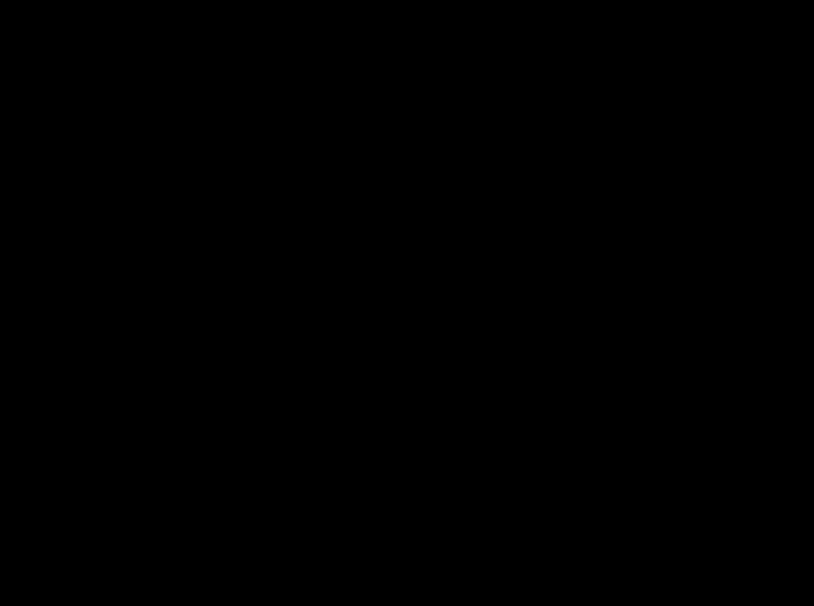

In [97]:
w.plot(tas)

## Databases

Datasets can be aggregated together into hierarchical collections, called databases . In typical usage, a program:

    - connects to a database
    - searches for data opens a dataset
    - accesses data

Databases add the ability to search for data and metadata in a distributed computing environment. At present CDMS supports one particular type of database, based on the Lightweight Directory Access Protocol (LDAP).

Here is an example of accessing data via a database:

Connect to a default database.

In [98]:
db = cdms.connect()

NameError: name 'cdms' is not defined

Open a dataset

In [99]:
f = db.open('ncep_reanalysis_mo')

NameError: name 'db' is not defined

List the variables in the dataset.

In [100]:
f.variables.keys()

[]

Databases are discussed further in Section 2.7.